In [1]:
import numpy as np

In [18]:
# 3 root found. 0.347, -1.879, and 1.532
def original_eq(x): return x**3 - 3*x + 1
def first_deriv_eq(x): return 3*x**2 - 3


def should_stop(x_, x, eps): return True if abs(original_eq(x_)) + abs(x_-x) < eps \
    else False


Newton Rhapson


In [6]:
x = 1.1
for i in range(100):
    x_ = x - original_eq(x)/first_deriv_eq(x)
    if should_stop(x_, x, 1e-4):
        break
    x = x_
    print(i, x)

print(x)


0 2.638095238095236
1 1.9979088997504912
2 1.665738100120937
3 1.548406077463979
4 1.5323828383309899
5 1.5320889844442256
1.5320889844442256


Secant

In [21]:
xold = 15
x = 19
def original_eq(x): return 25000*((1+12/100)**12)-250000
if xold == x:
    print("Choose xold not eq x")
    
for i in range(100):
    print(i,xold,x,original_eq(x))
    x_ = x - original_eq(x)*(x-xold)/(original_eq(x) - original_eq(xold))    
    if abs(x_ - x) < 1e-9:
        print('converged',i,x,x_)
        x = x_
        break
    xold = x
    x = x_
    
    
print(i,xold,x,original_eq(x))

0 15 19 6803
1 19 11.162442396313363 1358.354337686722
2 11.162442396313363 9.207093778950075 753.8693602500381
3 9.207093778950075 6.768526293802175 290.7805655384702
4 6.768526293802175 5.2373123224585525 128.94460904378155
5 5.2373123224585525 4.017300458755325 53.78211749259627
6 4.017300458755325 3.144327516508394 22.65434068891624
7 3.144327516508394 2.5089905770733387 9.267208544188549
8 2.5089905770733387 2.0691801793034204 3.6516680862085122
9 2.0691801793034204 1.7831807095218792 1.3204972080764446
10 1.7831807095218792 1.621175639494373 0.3972638451520156
11 1.621175639494373 1.551465466922851 0.08005094153397652
12 1.551465466922851 1.5338736070546102 0.007228289398507837
13 1.5338736070546102 1.532127460073461 0.00015591800299086245
14 1.532127460073461 1.5320889643928746 3.158935388825057e-07
15 1.5320889643928746 1.5320888862413842 1.3856027436531804e-11
converged 15 1.5320888862413842 1.532088886237956
15 1.5320889643928746 1.532088886237956 -4.440892098500626e-16


Bisection


In [15]:
xa = 1.2
xb = 1.56
xc = 0
epsilon = 1e-7


def is_same_sign(a, b): return np.sign(
    original_eq(a)) == np.sign(original_eq(b))


if xa >= xb:
    print('a must < b')
elif is_same_sign(xa, xb):
    print("Please choose new xa,xb")
else:
    err = xb - xa
    for i in range(100):
        err /= 2
        xc = xa + err
        if err < epsilon:
            print('converged')
            break
        if is_same_sign(xa, xc):
            xa = xc
        else:
            xb = xc
        print(i, xc, err, original_eq(xc))
print(xc)


0 1.38 0.18000000000000005 -0.09560000000000035
1 1.47 0.09000000000000002 0.16089999999999982
2 1.4249999999999998 0.04500000000000001 0.03062499999999968
3 1.4024999999999999 0.022500000000000006 -0.03299375000000038
4 1.4137499999999998 0.011250000000000003 -0.001310937500000442
5 1.4193749999999998 0.0056250000000000015 0.014625390624999568
6 1.4165625 0.0028125000000000008 0.006649316406249994
7 1.41515625 0.0014062500000000004 0.002667211914062051
8 1.4144531249999999 0.0007031250000000002 0.0006776428222652342
9 1.4141015624999997 0.0003515625000000001 -0.0003167709350593295
10 1.4142773437499998 0.00017578125000000005 0.00018040504455507644
11 1.4141894531249997 8.789062500000002e-05 -6.819067001440082e-05
12 1.4142333984374997 4.394531250000001e-05 5.610525607968597e-05
13 1.4142114257812497 2.1972656250000006e-05 -6.043189764826096e-06
14 1.4142224121093747 1.0986328125000003e-05 2.503091245831257e-05
15 1.4142169189453122 5.4931640625000015e-06 9.493831171880629e-06
16 1.414

False Position method

In [19]:
xa = 0.1
xb = 1.4
xc = 0
epsilon = 1e-7


def false_position(a, b): 
    return (a*original_eq(b) - b *original_eq(a))/(original_eq(b) - original_eq(a))


if xa >= xb:
    print('a must < b')
elif is_same_sign(xa, xb):
    print("Please choose new xa,xb")
else:
    err = xb - xa
    for i in range(100):
        err /= 2
        xc = false_position(xa, xb)
        if err < epsilon:
            print('converged')
            break
        if is_same_sign(xa, xc):
            xa = xc
        else:
            xb = xc
        print(i, xc, err, original_eq(xc))
print(xc)


0 0.8876404494382022 0.6499999999999999 -0.963544496282815
1 0.4317039323906237 0.32499999999999996 -0.21465587556020593
2 0.35394306181191354 0.16249999999999998 -0.017488723790901384
3 0.34776183736177607 0.08124999999999999 -0.001227788226069837
4 0.3473286459217867 0.040624999999999994 -8.518651299849189e-05
5 0.34729859384635275 0.020312499999999997 -5.905539324890796e-06
6 0.34729651050930893 0.010156249999999999 -4.0937697209919577e-07
7 0.3472963660907104 0.005078124999999999 -2.8378244421034537e-08
8 0.34729635607953147 0.0025390624999999997 -1.967195517593723e-09
9 0.34729635538555104 0.0012695312499999998 -1.363671398024735e-10
10 0.3472963553374439 0.0006347656249999999 -9.453104965473358e-12
11 0.3472963553341091 0.00031738281249999996 -6.552536291337674e-13
12 0.3472963553338779 0.00015869140624999998 -4.551914400963142e-14
13 0.3472963553338619 7.934570312499999e-05 -3.1086244689504383e-15
14 0.3472963553338608 3.9672851562499995e-05 -2.220446049250313e-16
15 0.347296355

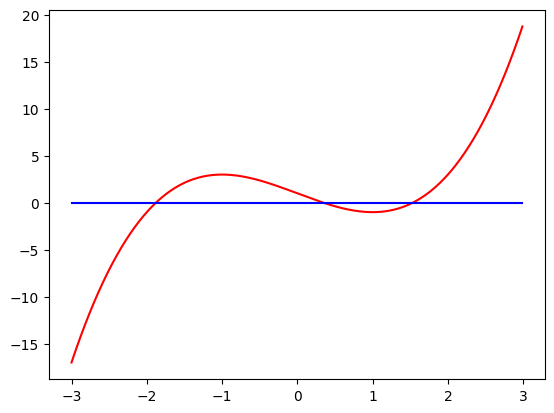

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3,3,0.01)
y = original_eq(x)
z = np.zeros_like(x)
plt.plot(x, y, 'red')
plt.plot(x,z,'blue')

System of Nonlinear equation with Newton's method

In [8]:
x = np.array([0.1, 1.2, 2.5],dtype=np.float64)
#x = np.array([1.,0.,1.], dtype = np.float64)

for k in range(10):
    F = np.array([ np.sum(x)-3, np.sum(np.multiply(x,x))-5, np.exp(x[0])+x[0]*x[1] -x[0]*x[2]-1 ],dtype=np.float64)
    J = np.array([[1,1,1],[2*x[0],2*x[1],2*x[2]],[np.exp(x[0])+x[1]-x[2], x[0], -x[0]]], dtype=np.float64)
    H = np.dot(np.linalg.inv(J), F) 
    x -= H
    print(k,x)

0 [0.00339806 0.87834204 2.1182599 ]
1 [0.00298539 0.98329528 2.01371934]
2 [0.0023541  0.99517524 2.00247067]
3 [1.19978652e-03 9.97600332e-01 2.00119988e+00]
4 [5.99888250e-04 9.98800223e-01 2.00059989e+00]
5 [2.99938158e-04 9.99400124e-01 2.00029994e+00]
6 [1.49967583e-04 9.99700065e-01 2.00014997e+00]
7 [7.49834168e-05 9.99850033e-01 2.00007498e+00]
8 [3.74916143e-05 9.99925017e-01 2.00003749e+00]
9 [1.87457838e-05 9.99962508e-01 2.00001875e+00]


In [9]:
a = np.array([-4, 3])
np.all(a <= 3)


True

In [10]:
def should_multi_stop(F, xnew, xold, eps):
    return np.all(np.absolute(F) + np.absolute(xnew - xold) <= eps)


In [11]:
#x = np.array([0.1, 1.2, 2.5],dtype=np.float64)
x = np.array([1.,0.,1.], dtype = np.float64)

for k in range(100):
    F = np.array([ np.sum(x)-3, np.sum(np.multiply(x,x))-5, np.exp(x[0])+x[0]*x[1] -x[0]*x[2]-1 ],dtype=np.float64)
    J = np.array([[1,1,1],[2*x[0],2*x[1],2*x[2]],[np.exp(x[0])+x[1]-x[2], x[0], -x[0]]], dtype=np.float64)
    H = np.dot(np.linalg.inv(J), F) 
    x_ = x - H
    if should_multi_stop(F,x_,x,1e-9):
        break
    x = x_
    print(k,x)

0 [ 1.47151776 -0.5         2.02848224]
1 [ 1.27321519 -0.15374491  1.88052972]
2 [ 1.22660403 -0.0953158   1.86871177]
3 [ 1.22439945 -0.09313727  1.86873782]
4 [ 1.22439432 -0.09313314  1.86873882]


Find Square root

x^2-a =0

In [12]:
SqRootOf = 2
def original_eq(x): return x**2-SqRootOf


def first_deriv_eq(x): return 2*x


Newton Raphson

In [13]:
x = 1.1  # Two root found. 1, and 1.5
for i in range(100):
    x_ = x - original_eq(x)/first_deriv_eq(x)
    if should_stop(x_, x, 1e-9):
        break
    x = x_
    print(i, x)

print(x)


0 1.459090909090909
1 1.414903709997168
2 1.4142137306897584
3 1.4142135623731051
1.4142135623731051
